<a href="https://colab.research.google.com/github/apkolla/clustering_usequity_fundamentals/blob/main/EDAandScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import requests
import time
import bs4 as bs
import datetime as dt
import io
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('final_data.csv')
df = df.drop(['TrailingPE','fiscalDateEnding'],axis=1)

In [ ]:
#Inspect Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  500 non-null    int64  
 1   Symbol                      500 non-null    object 
 2   MarketCapitalization        500 non-null    int64  
 3   BookValue                   500 non-null    float64
 4   EPS                         500 non-null    float64
 5   GrossProfitTTM              500 non-null    int64  
 6   DilutedEPSTTM               500 non-null    float64
 7   QuarterlyEarningsGrowthYOY  500 non-null    float64
 8   QuarterlyRevenueGrowthYOY   500 non-null    float64
 9   Beta                        500 non-null    float64
 10  totalRevenue                500 non-null    float64
 11  operatingIncome             500 non-null    int64  
 12  operatingExpenses           500 non-null    float64
 13  netIncome                   500 non

In [ ]:
df.describe()

,Unnamed: 0,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,operatingIncome,operatingExpenses,netIncome,totalAssets,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt
count,500.000000,5.000000e+02,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02
mean,249.500000,9.172993e+10,39.310910,7.979640,1.195485e+10,7.979640,1.943874,0.034800,1.066600,3.249368e+10,4.693339e+09,7.343284e+09,3.496684e+09,8.687268e+10,6.819598e+10,1.848048e+10,2.209233,921.812112,5.383240,3.797694e+09
std,144.481833,2.631301e+11,73.813404,23.355986,2.325595e+10,23.355986,17.251961,0.183481,0.429019,6.360717e+10,2.091297e+10,1.447945e+10,8.827388e+09,2.776377e+11,2.526587e+11,3.608941e+10,2.445051,9346.489444,44.490722,1.290201e+10
min,0.000000,5.939453e+09,-300.920000,-27.760000,-1.416000e+09,-27.760000,-0.995000,-0.730000,0.003000,6.140000e+08,-7.225900e+10,-2.349000e+09,-1.672000e+10,1.575281e+09,1.289000e+08,-1.723300e+10,0.000000,0.000000,-158.720000,0.000000e+00
25%,124.750000,1.758411e+10,14.127500,2.325000,2.612483e+09,2.325000,-0.259250,-0.041000,0.763750,5.953275e+09,6.912935e+08,1.291988e+09,6.638125e+08,1.262510e+10,7.025900e+09,3.503637e+09,0.500000,0.007575,1.279250,1.178500e+08
50%,249.500000,3.290621e+10,28.440000,5.010000,5.015900e+09,5.010000,0.041500,0.037500,1.059000,1.293050e+10,1.547406e+09,2.819408e+09,1.349000e+09,2.650430e+10,1.655215e+10,8.097000e+09,1.605000,0.018850,1.962000,8.742500e+08
75%,374.250000,6.963800e+10,49.772500,8.627500,1.024125e+10,8.627500,0.345250,0.103000,1.309000,2.861098e+10,3.776904e+09,7.877250e+09,3.275895e+09,6.319775e+10,4.238300e+10,1.873600e+10,3.127500,0.036475,3.012250,2.663500e+09
max,499.000000,3.124871e+12,1366.160000,463.260000,2.251520e+11,463.260000,310.900000,2.055000,3.312000,6.112890e+11,3.907050e+11,1.625440e+11,9.699500e+10,3.665743e+12,3.373411e+12,2.923320e+11,20.000000,160949.996948,844.200000,1.529270e+11


In [ ]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Symbol,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,operatingIncome,operatingExpenses,netIncome,totalAssets,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt
0,MMM,51511656000,8.70,-12.63,15000000000,-12.63,0.744,-0.008,1.016,3.268100e+10,-9128000000,2.297200e+10,-6995000000,50580000000,45712000000,4807000000,6.00,0.0650,4.153,2.947000e+09
1,AOS,11934819000,12.34,3.69,1329600000,3.69,0.268,0.056,1.242,3.744500e+09,362000000,7.727000e+08,235700000,3332300000,1584600000,1747700000,1.22,0.0159,1.984,1.000000e+07
2,ABT,195185590000,21.59,3.26,24579000000,3.26,0.553,0.015,0.745,4.309300e+10,8362000000,1.626600e+10,6933000000,74438000000,37752000000,36686000000,2.08,0.0197,26.920,2.251000e+09
3,ABBV,308598571000,6.85,2.72,41527000000,2.72,-0.668,-0.054,0.542,5.805400e+10,18117000000,3.075400e+10,11836000000,138805000000,121551000000,17254000000,5.99,0.0356,1.622,4.136000e+09
4,ACN,233034121000,42.55,10.78,20731607000,10.78,0.006,0.030,1.205,6.411174e+10,8809889000,1.367358e+10,6871557000,51245305000,25552466000,25692839000,4.82,0.0139,2.508,1.048100e+08


<ipython-input-5-7d9d2f5f852a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[j])
<ipython-input-5-7d9d2f5f852a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[j])
<ipython-input-5-7d9d2f5f852a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

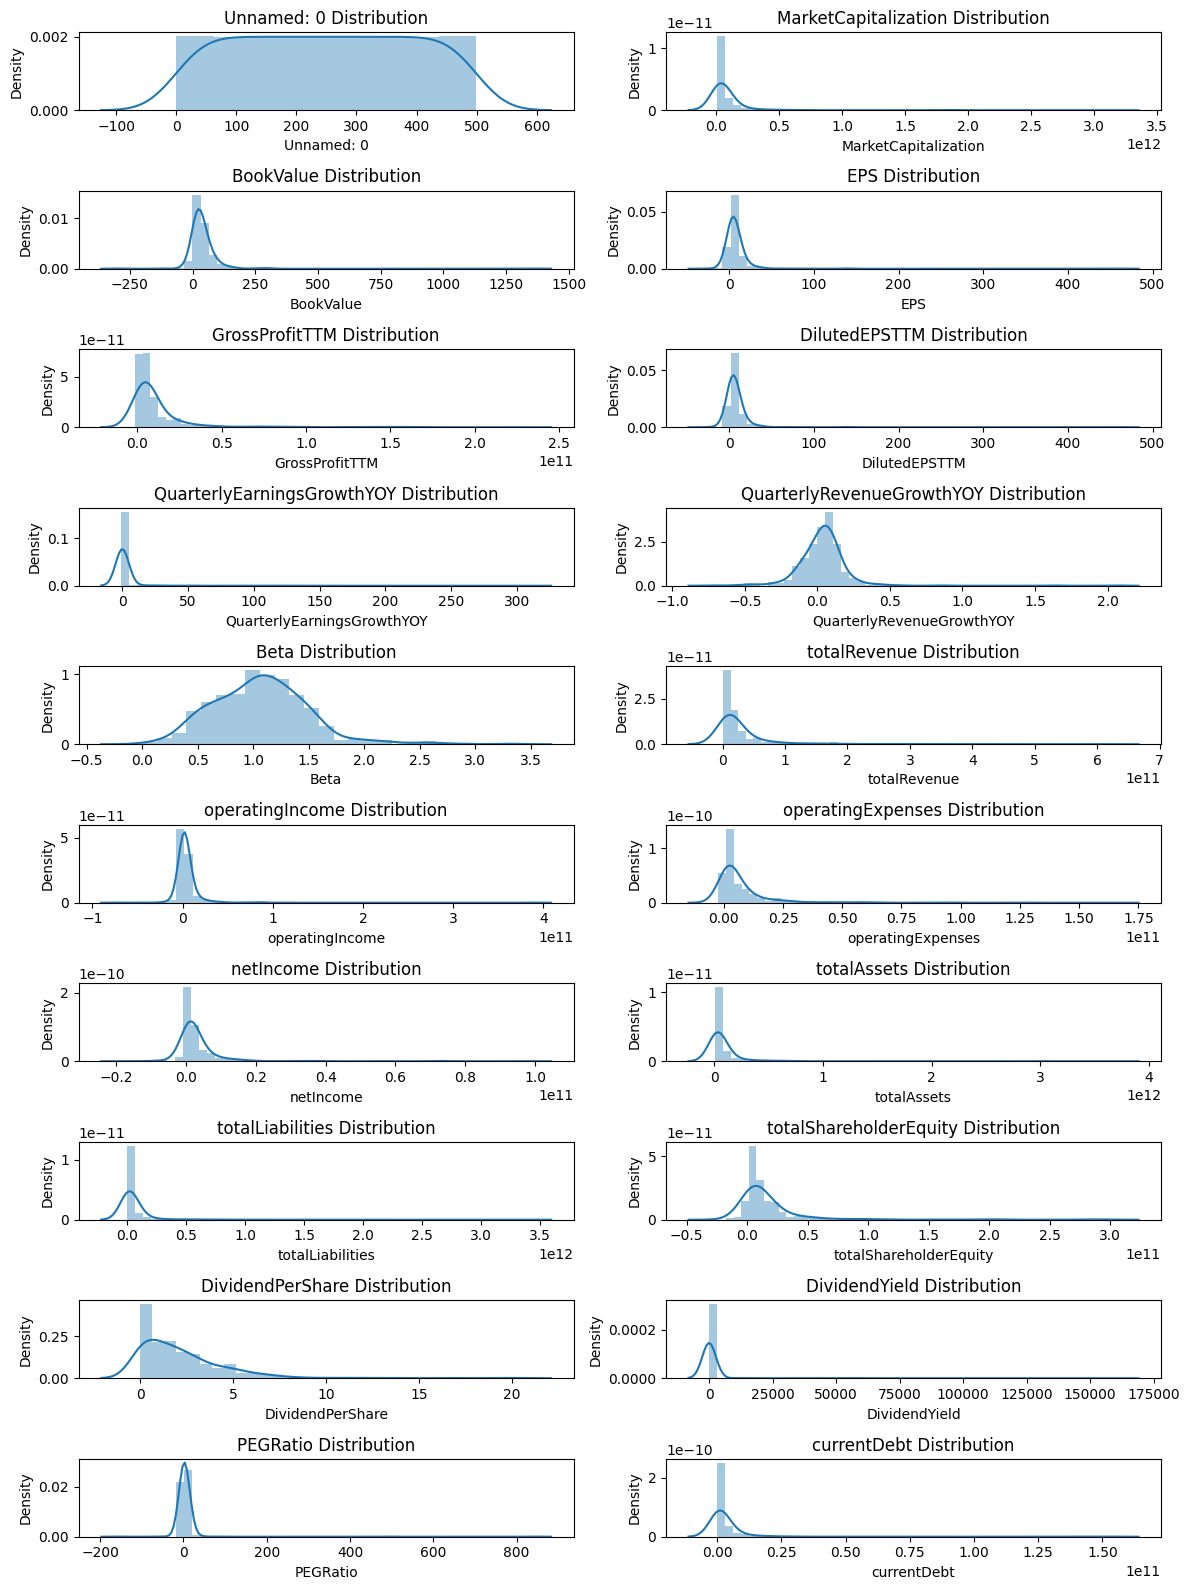

In [ ]:
# Visualize the distribution of each variable.
# using displot/histplot takes literal eons to run. going forward with depricated version
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(10,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

<ipython-input-6-eaed7a139f04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics=df.corr()


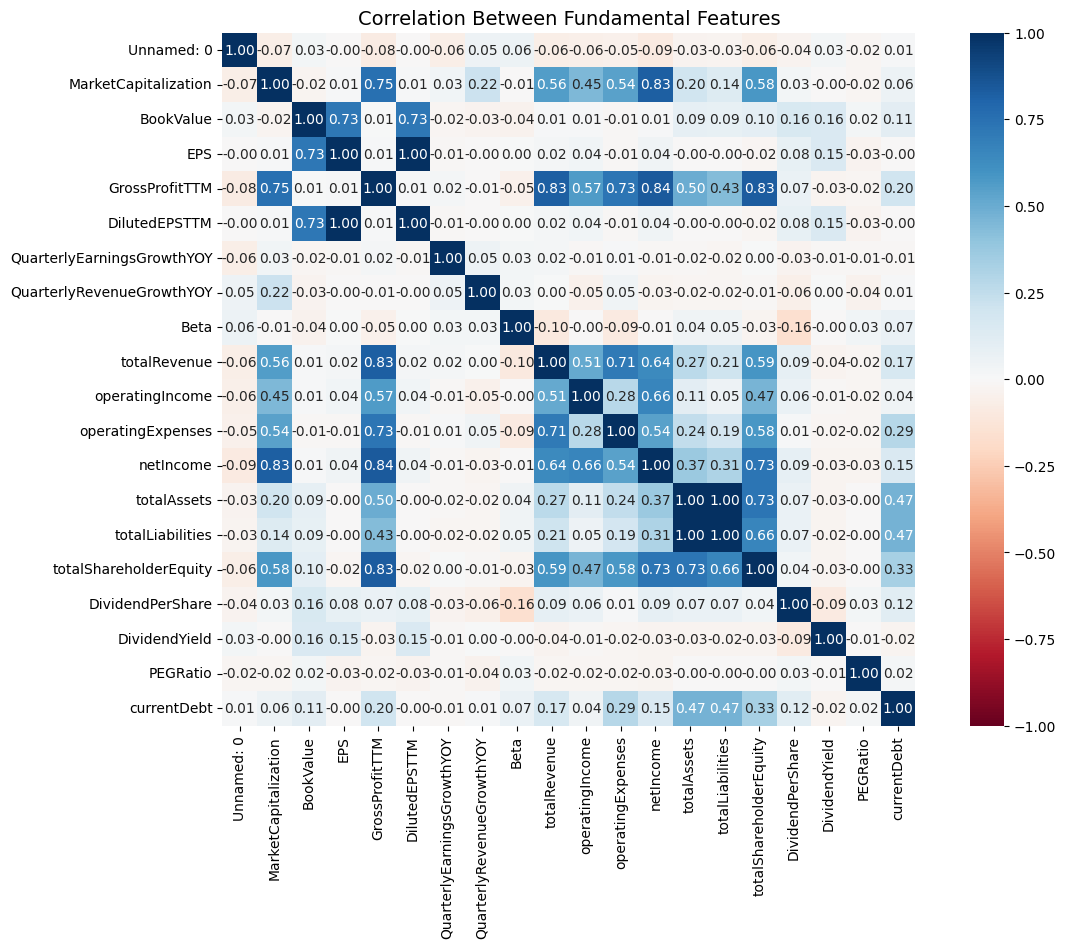

In [ ]:
#Check the correlation between our different variables
correlation_metrics=df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu',fmt='.2f')
plt.title('Correlation Between Fundamental Features', size=14)
plt.show()

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler
numerical = df.drop('Symbol',axis=1)
scaler = MinMaxScaler()
# transform data
scaled_data = scaler.fit_transform(numerical)
scaled_data = pd.DataFrame(scaled_data)

In [ ]:
syms = df['Symbol']
syms = pd.DataFrame(syms)
cols = df.columns
dat = pd.concat([syms,scaled_data],axis=1,)
dat.columns = cols

In [ ]:
dat.head()

,Symbol,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,operatingIncome,operatingExpenses,netIncome,totalAssets,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt
0,MMM,0.014611,0.185726,0.030813,0.072455,0.030813,0.005576,0.259246,0.306135,0.052511,0.136363,0.153560,0.085521,0.013374,0.013513,0.071197,0.3000,4.038521e-07,0.162399,0.019271
1,AOS,0.001922,0.187909,0.064050,0.012118,0.064050,0.004049,0.282226,0.374433,0.005126,0.156861,0.018932,0.149107,0.000480,0.000432,0.061314,0.0610,9.878845e-08,0.160236,0.000065
2,ABT,0.060677,0.193458,0.063175,0.114734,0.063175,0.004963,0.267504,0.224237,0.069561,0.174141,0.112891,0.208002,0.019885,0.011153,0.174177,0.1040,1.223983e-07,0.185100,0.014719
3,ABBV,0.097039,0.184616,0.062075,0.189537,0.062075,0.001048,0.242729,0.162889,0.094060,0.195212,0.200754,0.251119,0.037452,0.035995,0.111405,0.2995,2.211867e-07,0.159875,0.027046
4,ACN,0.072812,0.206031,0.078490,0.097753,0.078490,0.003209,0.272890,0.363252,0.103980,0.175108,0.097170,0.207462,0.013556,0.007537,0.138665,0.2410,8.636223e-08,0.160759,0.000685


In [ ]:
#checking output to make sure everything is bounded as expected
dat.describe()

,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,operatingIncome,operatingExpenses,netIncome,totalAssets,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,0.027506,0.204088,0.072787,0.059015,0.072787,0.009423,0.274614,0.321426,0.052204,0.166217,0.058779,0.177784,0.023279,0.020178,0.115367,0.110462,5.727320e-03,0.163625,0.024833
std,0.084365,0.044277,0.047566,0.102644,0.047566,0.055313,0.065882,0.129652,0.104159,0.045172,0.087811,0.077627,0.075771,0.074900,0.116581,0.122253,5.807076e-02,0.044361,0.084367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.003734,0.188982,0.061270,0.017780,0.061270,0.002359,0.247397,0.229903,0.008743,0.157572,0.022081,0.152872,0.003016,0.002045,0.066986,0.025000,4.706431e-08,0.159533,0.000771
50%,0.008646,0.197567,0.066739,0.028388,0.066739,0.003323,0.275583,0.319130,0.020169,0.159421,0.031344,0.158897,0.006803,0.004869,0.081824,0.080250,1.171171e-07,0.160214,0.005717
75%,0.020423,0.210363,0.074106,0.051451,0.074106,0.004297,0.299102,0.394681,0.045846,0.164237,0.062017,0.175842,0.016818,0.012526,0.116192,0.156375,2.266232e-07,0.161261,0.017417
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000


In [ ]:
dat.to_csv('scaled_data.csv')